In [1]:
%pylab inline
from galaxy2galaxy import problems
from astropy.visualization import make_lupton_rgb
import tensorflow as tf
Modes = tf.estimator.ModeKeys

Populating the interactive namespace from numpy and matplotlib


W0808 15:52:00.544862 140081077298816 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0808 15:52:01.386724 140081077298816 deprecation_wrapper.py:119] From /home/francois/.local/lib/python3.7/site-packages/tensor2tensor/utils/expert_utils.py:68: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



In [2]:
# To list the problems currently available in G2G
problems.available()

['attrs2img_cosmos',
 'attrs2img_cosmos32',
 'img2img_cosmos',
 'img2img_cosmos32',
 'img2img_hsc',
 'img2img_hsc_anomaly']

In [3]:
# Let's create an instance of the hsc_problem
hsc = problems.problem('img2img_hsc_anomaly')

# And extract the training dataset, assuming g2g-datagen has already
# been run using:
# $ g2g-datagen --problem=hsc_problem --data-dir=data/hsc_problem --tmp_dir=hsc_tmp
dset = hsc.dataset(Modes.TRAIN, data_dir='../data/hsc_anomaly')
dset = dset.batch(25)

W0808 15:52:02.578450 140081077298816 deprecation_wrapper.py:119] From /home/francois/.local/lib/python3.7/site-packages/tensor2tensor/data_generators/problem.py:644: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

W0808 15:52:02.587126 140081077298816 deprecation.py:323] From /home/francois/.local/lib/python3.7/site-packages/tensor2tensor/data_generators/problem.py:680: parallel_interleave (from tensorflow.python.data.experimental.ops.interleave_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.
W0808 15:52:02.640221 140081077298816 deprecation_wrapper.py:119] From /home/francois/repo/galaxy2galaxy/galaxy2galaxy/data_generators/astroimage_utils.py:185: The name tf.FixedLenFeature is deprecated. Please us

In [4]:
# Build an iterator over this dataset, and extract a batch
it = dset.make_one_shot_iterator().get_next()

sess = tf.Session()
batch = sess.run(it)

W0808 15:52:02.896046 140081077298816 deprecation.py:323] From <ipython-input-4-91ef2c814408>:2: DatasetV1.make_one_shot_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


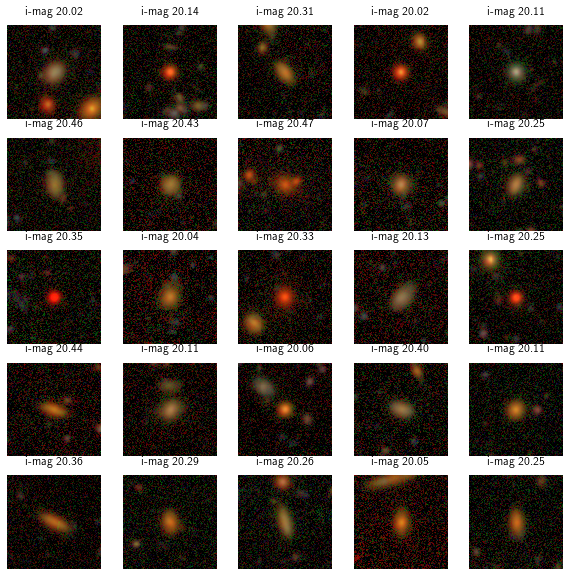

In [5]:
figure(figsize=(10,10))
for i in range(25):
    subplot(5,5,i+1)
    cutout = make_lupton_rgb(batch['inputs'][i,:,:,2],
                         batch['inputs'][i,:,:,1],
                         batch['inputs'][i,:,:,0],
                         Q=15, stretch=0.5, minimum=0)
    title('i-mag %0.2f'%batch['i_cmodel_mag'][i])
    imshow(cutout)
    axis('off')